# 快速傅里叶变换 (FFT)

### 刘宏旭

### 下面的例子用 $sin(2 \pi f t)$ 做分析对象。其中 $f = 187.5$。


D:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


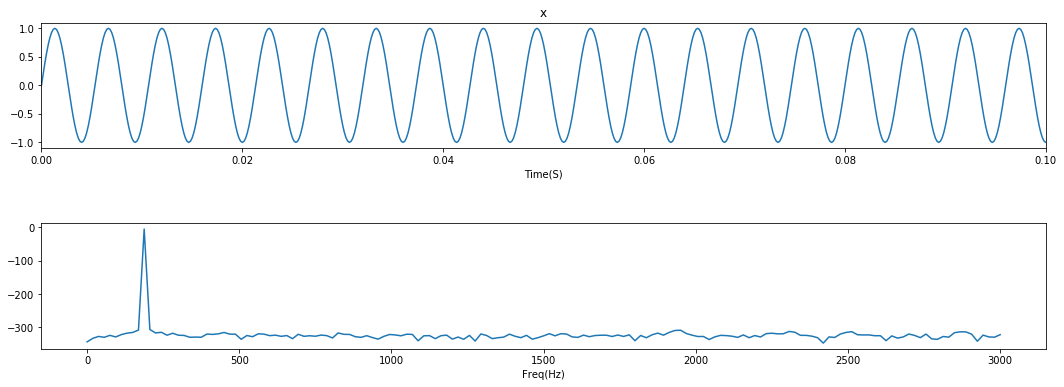

freq(Hz): 187.5


In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import math
rates=6000#数字信号的取样频率
fft_size=320#fft处理的数据长度
t=np.arange(0,1,1/rates)#生成周期为（1/取样频率）的时间
x=np.sin(2*math.pi*187.5*t)#生成正弦波（特别注意：为了保证被采样数字信号的 FFT 计算结果精确，
#需要保证被采样数字信号中所有频率都是基频的整数倍，即（rates/fft_size=6000/320=18.75），这里取值187.5为18.75的10倍）
#如果并不知道被采样数字信号的所有频率成分，因此只能对测量信号进行假设。而快速傅里叶会假设测量范围之外的信号是所测量信号的重复。
#这就会引起在 fft_size 个点的采样范围内无法放下整数个所有被采样频率的波形而造成频谱泄漏。
xs=x[:fft_size]#读取fft_size长度的数据
xf= np.fft.rfft(xs)/fft_size#rfft函数的返回值是N/2+1个复数，表示从0(Hz)到rates/2(Hz)的N/2+1点频率的成分。
freqs = np.linspace(0, rates/2, fft_size/2+1)#生成rfft返回值中每个下标对应的真正的频率
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-20, 1e100))#转换为以db单位的值

#绘图
plt.figure(figsize=(18,6))
plt.subplot(211)
plt.xlim(0,0.1)
plt.plot(t,x)
plt.xlabel(u"Time(S)")
plt.title(u"x")
plt.subplot(212)
plt.plot(freqs, xfp)
plt.xlabel(u"Freq(Hz)")
plt.subplots_adjust(hspace=0.6)
plt.show()
local_max=[]

#寻找峰值
for i in np.arange(1,len(xfp)-1):  
    if xfp[i]>xfp[i-1] and xfp[i]>xfp[i+1]:  
        local_max.append(xfp[i])  
local_max=sorted(local_max)  
loc1=np.where(xfp==local_max[-1])  
max_freq=freqs[loc1[0][0]]
print('freq(Hz):',max_freq)

### 下面以简谐双振子 $X_1$ 为分析对象。

照理应该有两个峰，为啥只有只有 $\omega = \sqrt{\frac{k}{m}}$,这一个峰? 有兴趣的同学可以分析分析。

D:\python\Anaconda\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


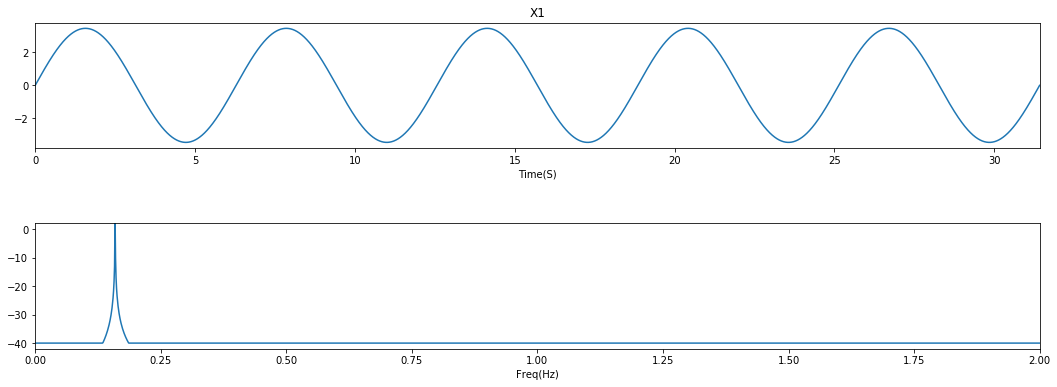

freq(Hz): 0.159


In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.integrate import odeint 
import math
def f(x,k,a,b):
    return(-k*x-a*x*x-b*x*x*x)
def H(x,t,m,k,a,b):
    return np.array([x[2]/m,x[3]/m,(f(x[0],k,a,b)-f(x[1]-x[0],k,a,b)),(f(x[1]-x[0],k,a,b)-f(-x[1],k,a,b))])
sampling_rate = 1000
k=1
m=1
a=0
b=0
E1=6
E2=6
x0=np.array([0,0,math.sqrt(E1*2*m),math.sqrt(E2*2*m)])
t=np.arange(0,1000,1/sampling_rate)
x_t=odeint(H,x0,t,args=(m,k,a,b))
X1=x_t[:,0]
X2=x_t[:,1]
P1=x_t[:,2]
P2=x_t[:,3]
xf= np.fft.rfft(X1)/len(X1)#在这里，数据处理样本为全部数据。
freqs = np.linspace(0, sampling_rate/2, len(X1)/2+1)#生成rfft下标对应的频率。
xfp = 20*np.log10(np.clip(np.abs(xf), 1e-2, 1e100))#这里发生了频谱泄露，为了更好的观察峰值，这里调整了纵轴的参数，此时纵轴不具有实际意义。
local_max=[]  
for i in np.arange(1,len(xf)-1):  
    if xf[i]>xf[i-1] and xf[i]>xf[i+1]:  
        local_max.append(xf[i])  
local_max=sorted(local_max)  
loc1=np.where(xf==local_max[-1])  
max_freq=freqs[loc1[0][0]]  
plt.figure(figsize=(18,6))
plt.subplot(211)
plt.xlim([0,10*math.pi])
plt.plot(t,X1)
plt.xlabel(u"Time(S)")
plt.title(u"X1")
plt.subplot(212)
plt.xlim([0,2])
plt.ylim([-42,2])
plt.plot(freqs, xfp)
plt.xlabel(u"Freq(Hz)")
plt.subplots_adjust(hspace=0.6)
plt.show()
print('freq(Hz):',max_freq)